 # Breast Cancer Classification

The Project Is Cancer Classification Problem in which I Have use 4 different Model for classification.
The Project would cover the following topics

1.Data Pre Processing
2.Train-Test Split
3.Cross Validation
4.Model Training
5.Model Evaluation
6.Model Deploment 


DataSet=https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

First Part Data Pre Processing

The Fours Model Used for Training model
1.KNN(K-Nearest Neighbor)
2.LogisticRegression  
3.DecisionTreeClassifier
4.RandomForestClassifier

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import pickle

In [41]:
df=pd.read_csv("Breast Cancer Classification.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
df.shape

(569, 32)

Data Trasformation to NaN to 0

In [43]:
df.replace(to_replace=np.NaN,value=0,inplace=True)
df.isnull

<bound method DataFrame.isnull of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [44]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Changing the InDependent varriable to Classification to labels 

In [45]:

label_encoder =preprocessing.LabelEncoder()
df["diagnosis"]=label_encoder.fit_transform(df['diagnosis']) 
df.diagnosis



0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [46]:
df.drop(columns=["id"],inplace=True)


In [47]:
df.dtypes
df


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [48]:
Y= df["diagnosis"]                              # Feature Selection Independent Varriable
Y.shape

(569,)

In [49]:
X=df.drop(columns="diagnosis")                      #Dedependent Varriable 
X.shape

(569, 30)

Model Training
80% of data is training 
20% of data is Testing

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

Model Training

1. KNN Classifier 

In [51]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,Y_train)                                 #model Training

KNeighborsClassifier()

In [52]:
predict_variable=classifier.predict(X_test)                 # Making the Predication making using X test data

In [53]:
metrics.accuracy_score(Y_test,predict_variable)

0.9473684210526315

2.Logistic Regression

In [54]:
logistic_regression_model = LogisticRegression(solver='liblinear', max_iter=1000)


In [55]:
logistic_regression_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [56]:
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [57]:
metrics.accuracy_score(Y_test,logistic_regression_predictions)     # Accuracy Score 

0.9649122807017544

3.Descion Tree Classification

In [58]:
descision_tree=DecisionTreeClassifier()

In [59]:
descision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [60]:
decision_tree_predictions = descision_tree.predict(X_test)


In [61]:
metrics.accuracy_score(Y_test, decision_tree_predictions)

0.9181286549707602

4.Random Forest Classification

In [62]:
Random_forest=RandomForestClassifier()

In [63]:
Random_forest.fit(X_train,Y_train)

RandomForestClassifier()

In [64]:
Random_forest_predict=Random_forest.predict(X_test)

In [65]:
metrics.accuracy_score(Y_test,Random_forest_predict)

0.9532163742690059

Cross Validation

1.Holdout Validation Apporach
Most basic Vallidation apporach.The data is divided into Test and Train. Which divided on the train_test split Fuctions.
Give only accuracy score 

In [66]:
Accuracy_1 =metrics.accuracy_score(Y_test,predict_variable) *100    # Accuracy Score
print("KNN  Accuracy Score ", Accuracy_1)
Accuracy_2=metrics.accuracy_score(Y_test,logistic_regression_predictions)*100
print("LogisticRegression Accuracy Score",Accuracy_2)
Accuracy_3=metrics.accuracy_score(Y_test,decision_tree_predictions)*100
print("DecisionTreeClassifier  Accuracy Score",Accuracy_3)
Accuracy_4=metrics.accuracy_score(Y_test,Random_forest_predict)*100
print("Random_forest Accuracy Score",Accuracy_4)

KNN  Accuracy Score  94.73684210526315
LogisticRegression Accuracy Score 96.49122807017544
DecisionTreeClassifier  Accuracy Score 91.81286549707602
Random_forest Accuracy Score 95.32163742690058


2.Strafied K-fold Cross Validation:

In this Cross Validation apporach this.The data is divided into k layers of test and train data.
In this example the k=10 meaning the 10 different segements of test and train data are made

In [67]:
from sklearn.model_selection import StratifiedKFold

In [68]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cvs_score=cross_val_score(classifier,X,Y,cv=10)
print("KNN",cvs_score)

KNN [0.9122807  0.87719298 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]


In [69]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cvs_score=cross_val_score(logistic_regression_model,X,Y,cv=10)
print("LogisticRegression ",cvs_score)

LogisticRegression  [0.94736842 0.9122807  0.92982456 0.94736842 0.96491228 0.98245614
 0.94736842 0.94736842 0.96491228 0.96428571]


In [70]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cvs_score=cross_val_score(descision_tree,X,Y,cv=10)
print("Descion tree ",cvs_score)

Descion tree  [0.89473684 0.85964912 0.92982456 0.89473684 0.96491228 0.87719298
 0.85964912 0.94736842 0.92982456 0.94642857]


In [71]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cvs_score=cross_val_score(Random_forest,X,Y,cv=10)
print("Random Forest tree ",cvs_score)

Random Forest tree  [0.98245614 0.87719298 0.94736842 0.96491228 1.         0.98245614
 0.94736842 0.98245614 0.94736842 1.        ]


Model Evaluation

In [72]:
print("KNN")
precision = metrics.precision_score(Y_test, predict_variable)
print("Precision:", precision)

recall = metrics.recall_score(Y_test, predict_variable)
print("Recall:", recall)

confusion_matrix = metrics.confusion_matrix(Y_test, predict_variable)
print("Confusion Matrix:\n", confusion_matrix)


KNN
Precision: 0.921875
Recall: 0.9365079365079365
Confusion Matrix:
 [[103   5]
 [  4  59]]


In [73]:
print("Logestic Regression")
precision = metrics.precision_score(Y_test, logistic_regression_predictions)
print("Precision:", precision)

recall = metrics.recall_score(Y_test, logistic_regression_predictions)
print("Recall:", recall)

confusion_matrix = metrics.confusion_matrix(Y_test, logistic_regression_predictions)
print("Confusion Matrix:\n", confusion_matrix)


Logestic Regression
Precision: 0.9253731343283582
Recall: 0.9841269841269841
Confusion Matrix:
 [[103   5]
 [  1  62]]


In [74]:
print("Descion Tree")
precision = metrics.precision_score(Y_test, decision_tree_predictions)
print("Precision:", precision)

recall = metrics.recall_score(Y_test, decision_tree_predictions)
print("Recall:", recall)

confusion_matrix = metrics.confusion_matrix(Y_test, decision_tree_predictions)
print("Confusion Matrix:\n", confusion_matrix)


Descion Tree
Precision: 0.8450704225352113
Recall: 0.9523809523809523
Confusion Matrix:
 [[97 11]
 [ 3 60]]


In [75]:
print("Random Forest")
precision = metrics.precision_score(Y_test, Random_forest_predict)
print("Precision:", precision)

recall = metrics.recall_score(Y_test, Random_forest_predict)
print("Recall:", recall)

confusion_matrix = metrics.confusion_matrix(Y_test, Random_forest_predict)
print("Confusion Matrix:\n", confusion_matrix)


Random Forest
Precision: 0.9365079365079365
Recall: 0.9365079365079365
Confusion Matrix:
 [[104   4]
 [  4  59]]


Model Saving

In [76]:
with open("Knn_model.pkl","wb") as knn_model:
    pickle.dump(predict_variable,knn_model)

with open("Logestic Regression.pkl","wb") as Logestic_Regression:
    pickle.dump(logistic_regression_predictions,Logestic_Regression)

with open("Descion_tree.pkl","wb") as Descion_tree_model:
    pickle.dump(decision_tree_predictions,Descion_tree_model)
    
with open("Random_forest_classification.pkl","wb") as Random_forest_model:
    pickle.dump(Random_forest_predict,Random_forest_model)


Visualizing 

<Axes: >

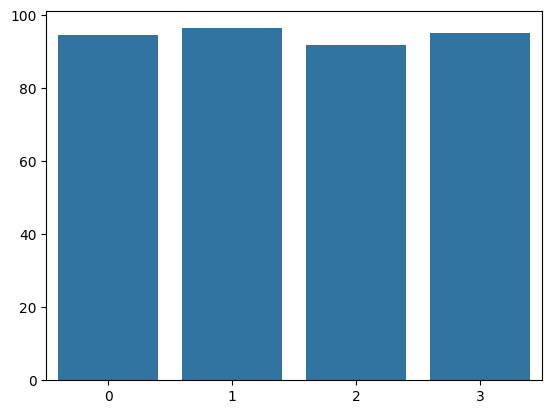

In [77]:
sns.barplot(data=[Accuracy_1,Accuracy_2,Accuracy_3,Accuracy_4])